<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/heat_equation_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.youtube.com/watch?v=CXOrkQs4WYo

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter

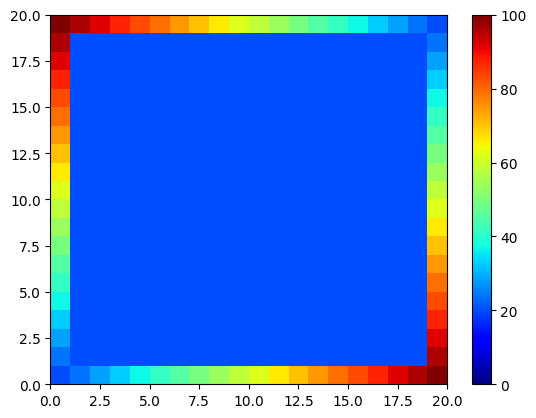

In [11]:
a = 110
length = 50
time = 8
nodes = 20

dx = length / (nodes - 1)
dy = length / (nodes - 1)
dt = min(dx**2 / (4 * a), dy**2 / (4 * a))
t_nodes = int(time / dt) + 1

u = np.zeros((nodes, nodes)) + 20

u[0, :] = np.linspace(20, 100, nodes)
u[-1, :] = np.linspace(100, 20, nodes)

u[:, 0] = np.linspace(20, 100, nodes)
u[:, -1] = np.linspace(100, 20, nodes)

w_array = []
counter = 0

while counter < time :
    w = u.copy()
    w_array.append(w)

    for i in range(1, nodes - 1):
        for j in range(1, nodes - 1):
            dd_ux = (w[i - 1, j] - 2 * w[i, j] + w[i + 1, j]) / dx**2
            dd_uy = (w[i, j - 1] - 2 * w[i, j] + w[i, j + 1]) / dy**2

            u[i, j] = dt * a * (dd_ux + dd_uy) + w[i, j]

    counter += dt

fig, ax = plt.subplots()
pcm = ax.pcolormesh(u, cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=ax)

z = np.array(w_array)

def animate(i):
    pcm.set_array(z[i])

ani = animation.FuncAnimation(fig, animate, frames=160, interval=50)
ani.save('heat_plate.gif', writer='pillow', fps=20)